# Traffic Sign Predictor

In this project, I am looking at **the traffic sign dataset** from kaggle: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign. The dataset contains images of many thousands traffic signs and is **labelled into 43 classes like speed limit, yield, stop etc**. The aim of this project is to **classify an image into one of the 43 classes** with some reasonable accuracy using **Convolutional Neural Networks and Keras**. 

This project utilizes **computer vision** technology to automatically detect and interpret traffic signs from images or video streams. It helps drivers by providing real time information about speed limits, stop signs and reduces the likelihood of accidents.

### Loading the data.

The data came as folders on Test, Train and Meta. I first compressed the file to a zip format and then uploaded the zipped file and unzipped it.

In [85]:
# unzipping the zipped file
import zipfile as zf
files = zf.ZipFile("archive.zip", 'r')
files.extractall('/Users/ellietripathi/Python_Projects/Traffic_Sign_Detection/')
files.close()

In [86]:
# providing explicit paths for the respective datasets.
data_dir = "/Users/ellietripathi//Python_Projects/Traffic_Sign_Detection"
train_path = 'archive/Train'
test_path = 'archive/Test'

### Dataset exploration

In [87]:
# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [88]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [103]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

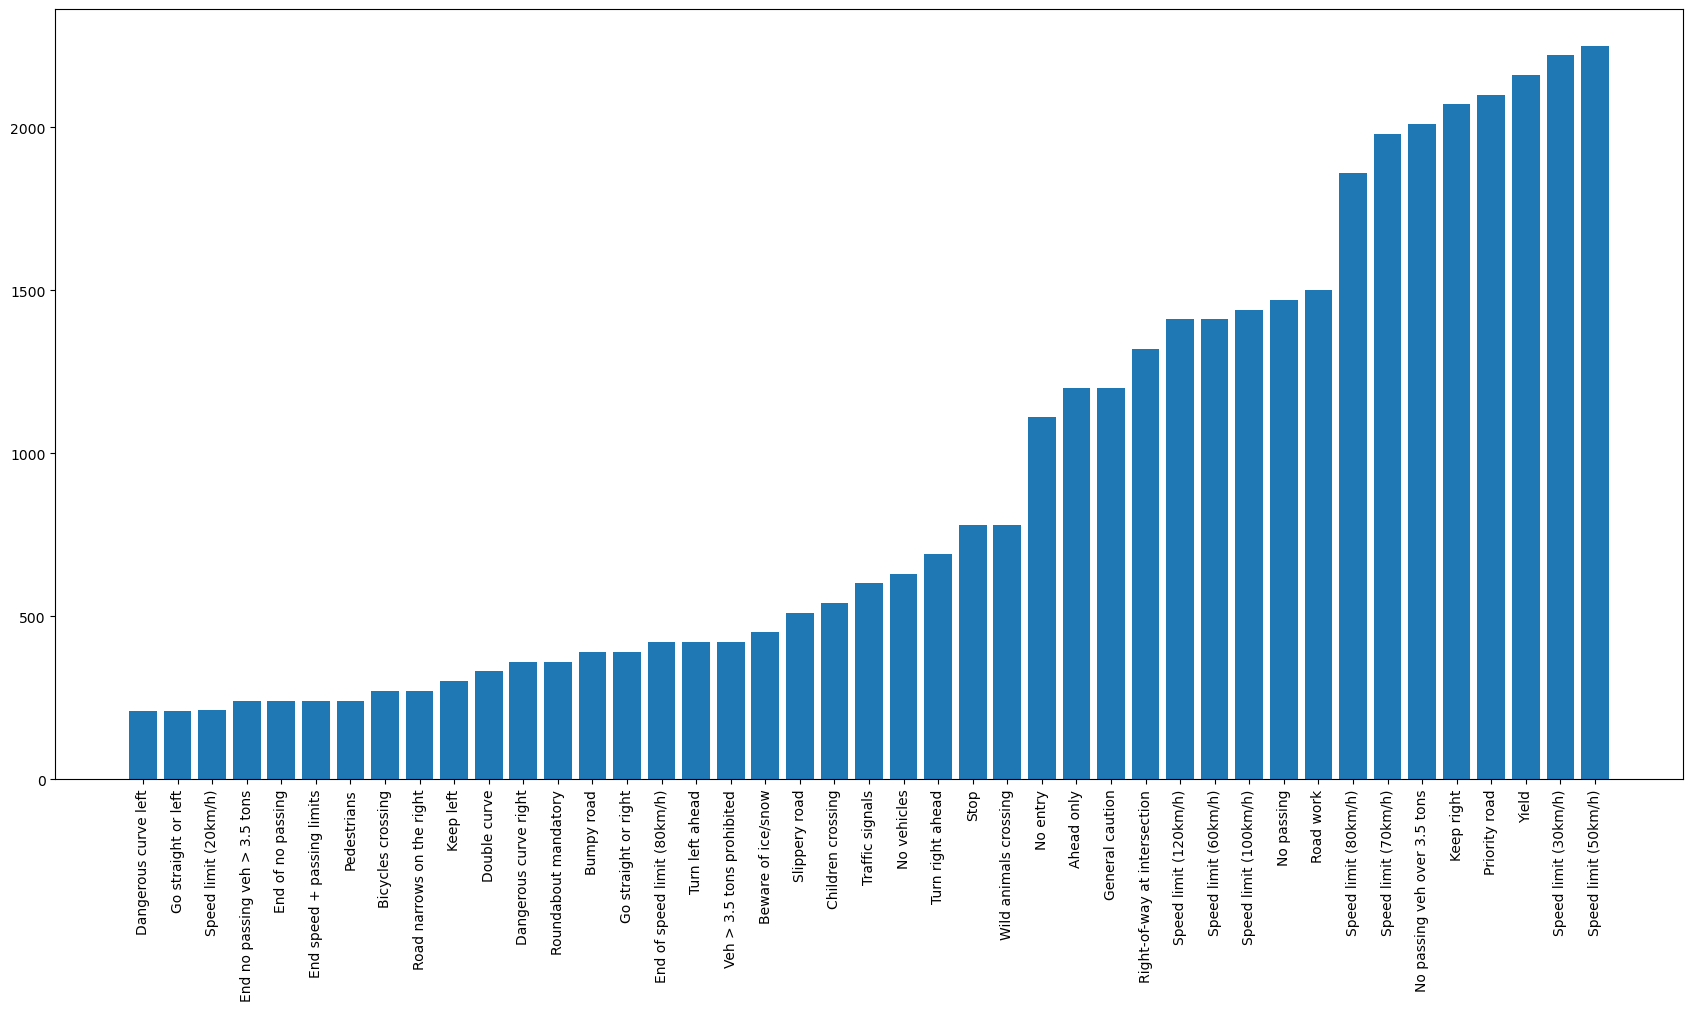

In [90]:
# Plotting all the labels and seeing how many images correspond to each label.
import os
import matplotlib.pyplot as plt

folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(os.path.join(train_path, folder))
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
sorted_pairs = sorted(zip(train_number, class_num))
train_number, class_num = zip(*sorted_pairs)

# Plotting the number of images in each class
plt.figure(figsize=(21, 10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()


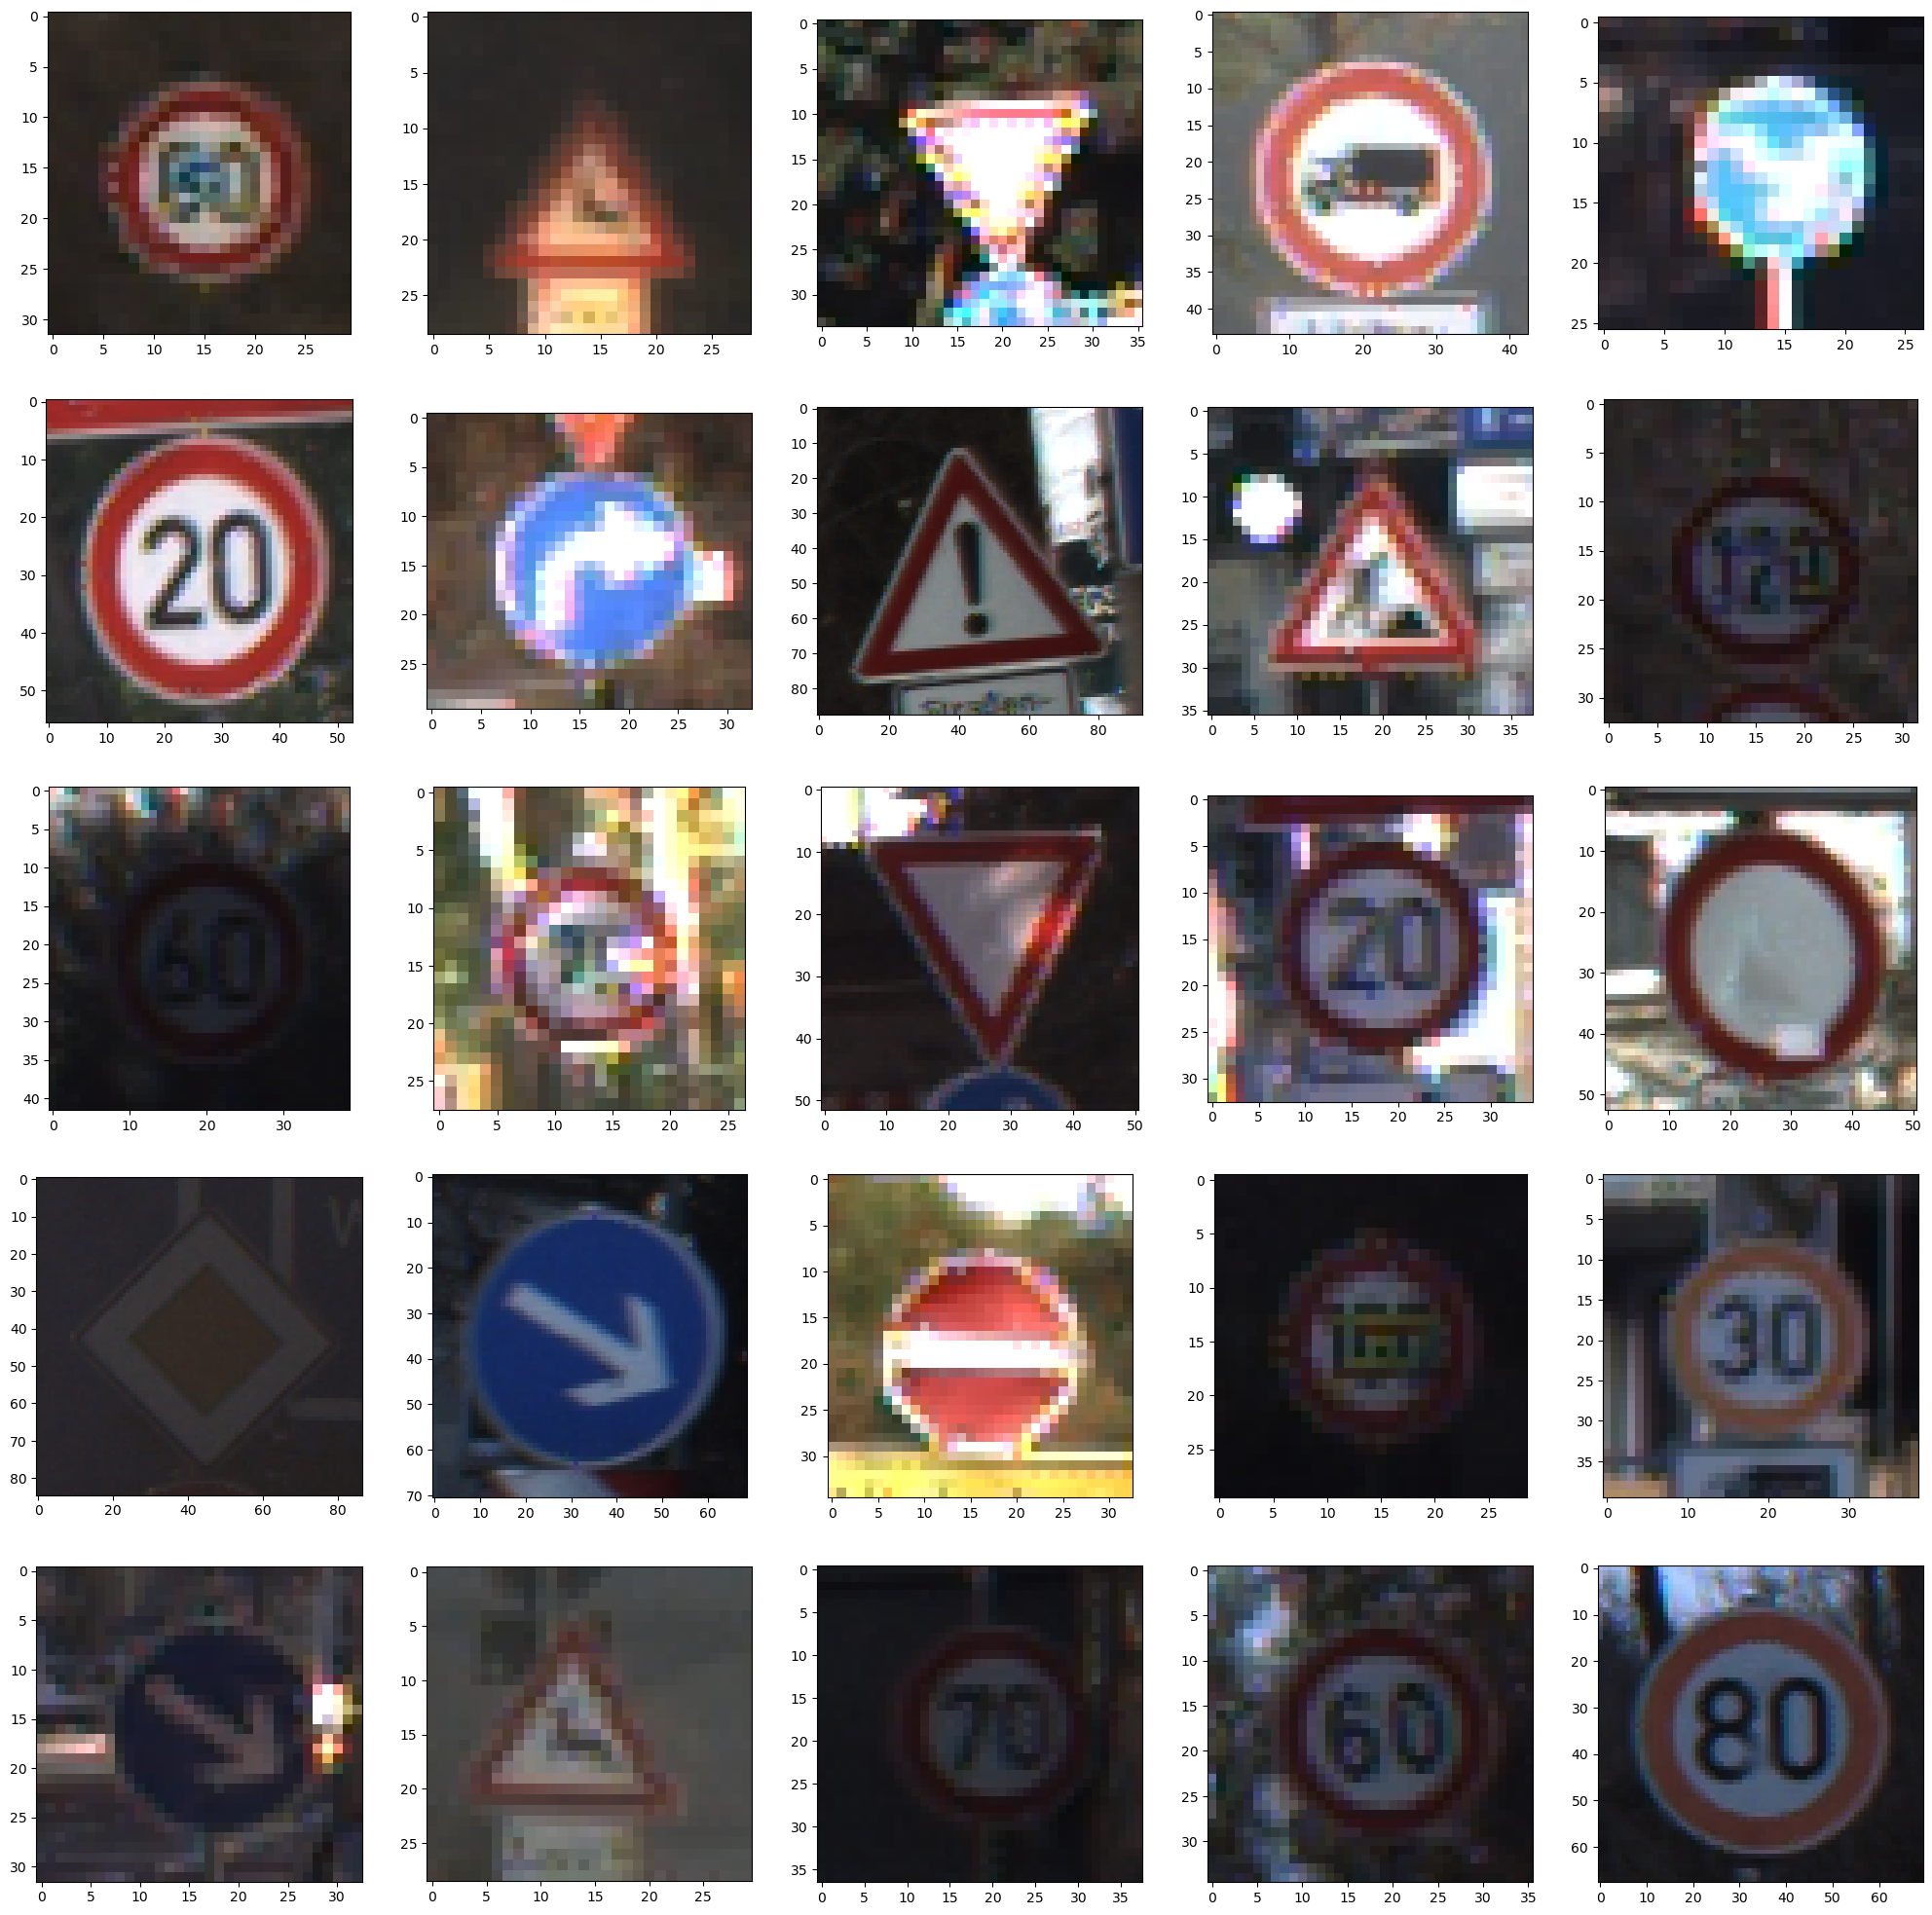

In [93]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/archive/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/archive/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)

### Model Building

I will now split the training data into train and validation set and train the model. Finally, I will implement the model on completely unseen Test data and make predictions on it. I will evaluate the performance of model using accuracy score.

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image

import os 
import numpy as np  # Add this import
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43 
cur_path = os.getcwd()
for i in range(classes): 
    path = os.path.join(cur_path, 'archive/train', str(i)) 
    images = os.listdir(path) 
    for a in images: 
       try: 
        image = Image.open(os.path.join(path, a)) 
        image = image.resize((30, 30)) 
        image = np.array(image) 
        data.append(image) 
        labels.append(i) 
       except: 
        print("Error loading image") 
data = np.array(data)
labels = np.array(labels)


Error loading image


In [96]:
print(data.shape, labels.shape)

#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [97]:
# Build the model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [98]:
# Fitting the model.
eps = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=eps, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 31s 31ms/step - loss: 2.1114 - accuracy: 0.4542 - val_loss: 0.7114 - val_accuracy: 0.8067
Epoch 2/15
981/981 [==============================] - 43s 44ms/step - loss: 0.9892 - accuracy: 0.7065 - val_loss: 0.4750 - val_accuracy: 0.8620
Epoch 3/15
981/981 [==============================] - 43s 44ms/step - loss: 0.7735 - accuracy: 0.7666 - val_loss: 0.3654 - val_accuracy: 0.9058
Epoch 4/15
981/981 [==============================] - 39s 40ms/step - loss: 0.6745 - accuracy: 0.7989 - val_loss: 0.3012 - val_accuracy: 0.9216
Epoch 5/15
981/981 [==============================] - 39s 40ms/step - loss: 0.6153 - accuracy: 0.8160 - val_loss: 0.2428 - val_accuracy: 0.9308
Epoch 6/15
981/981 [==============================] - 39s 40ms/step - loss: 0.5529 - accuracy: 0.8329 - val_loss: 0.2110 - val_accuracy: 0.9410
Epoch 7/15
981/981 [==============================] - 39s 40ms/step - loss: 0.5155 - accuracy: 0.8456 - val_loss: 0.1949 - val_accuracy:

In [99]:
# saving the model
model.save("model.keras")

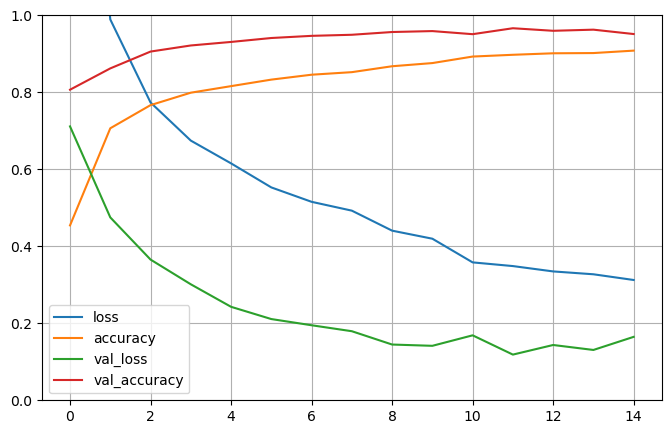

In [100]:
# plotting the loss and accuracy of both the training and the validation set.
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Testing the model

In [101]:
#testing accuracy on Test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('archive/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
   image = Image.open(img)
   image = image.resize((30,30))
   data.append(np.array(image))
X_test=np.array(data)
pred_probs = model.predict(X_test)
pred = np.argmax(pred_probs, axis=1)

# Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred)*100)

395/395 [==============================] - 4s 11ms/step
91.53602533650039


**We achieved an accuracy of 91%.**

<Axes: >

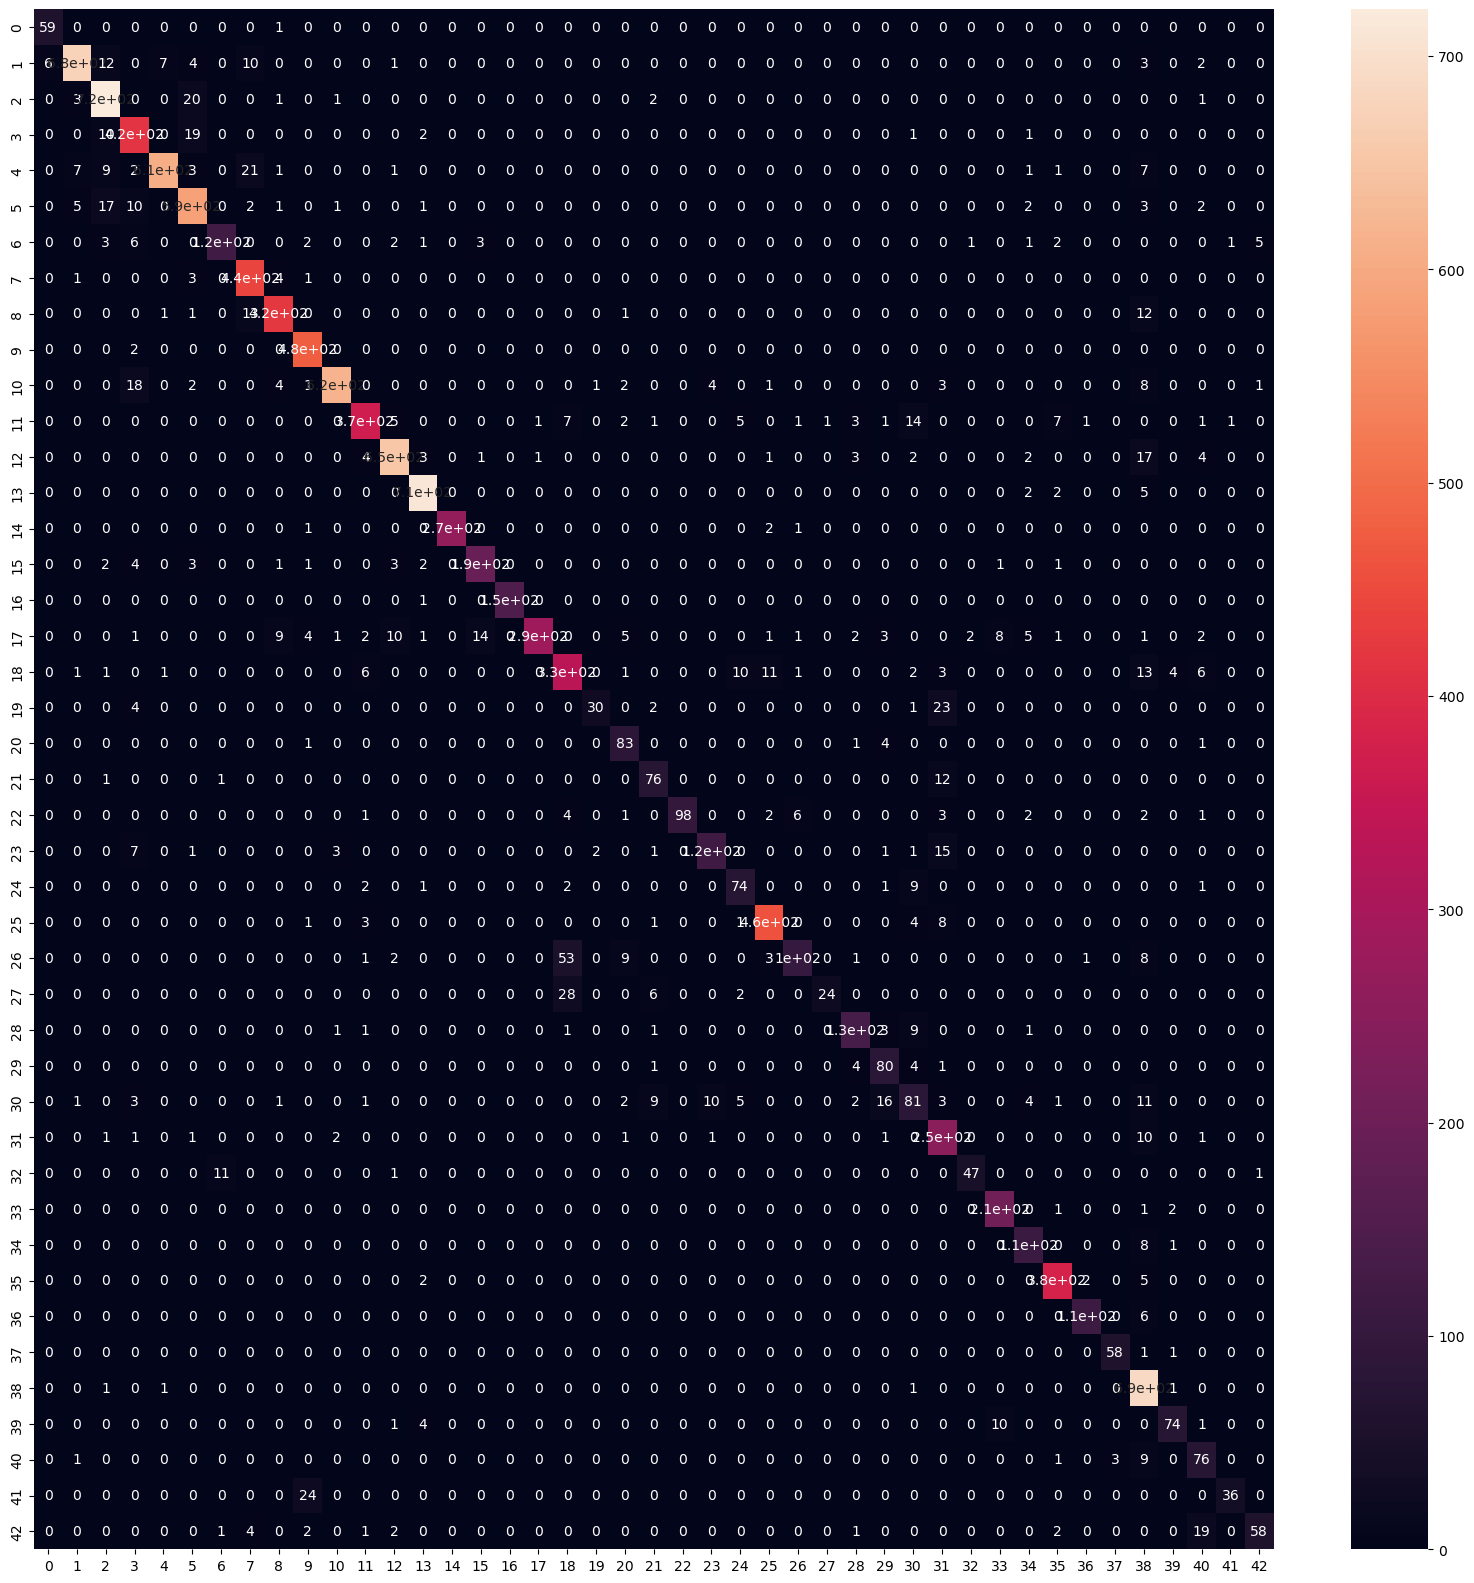

In [104]:
# plotting the heatmap.
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

In [105]:
# printng the classification report
from sklearn.metrics import classification_report
print(classification_report(labels,pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        60
           1       0.97      0.94      0.95       720
           2       0.93      0.96      0.94       750
           3       0.88      0.93      0.90       450
           4       0.98      0.92      0.95       660
           5       0.91      0.93      0.92       630
           6       0.90      0.82      0.86       150
           7       0.90      0.98      0.94       450
           8       0.95      0.94      0.94       450
           9       0.93      1.00      0.96       480
          10       0.99      0.93      0.96       660
          11       0.94      0.88      0.91       420
          12       0.96      0.94      0.95       690
          13       0.98      0.99      0.98       720
          14       1.00      0.99      0.99       270
          15       0.91      0.91      0.91       210
          16       1.00      0.99      1.00       150
          17       0.99    

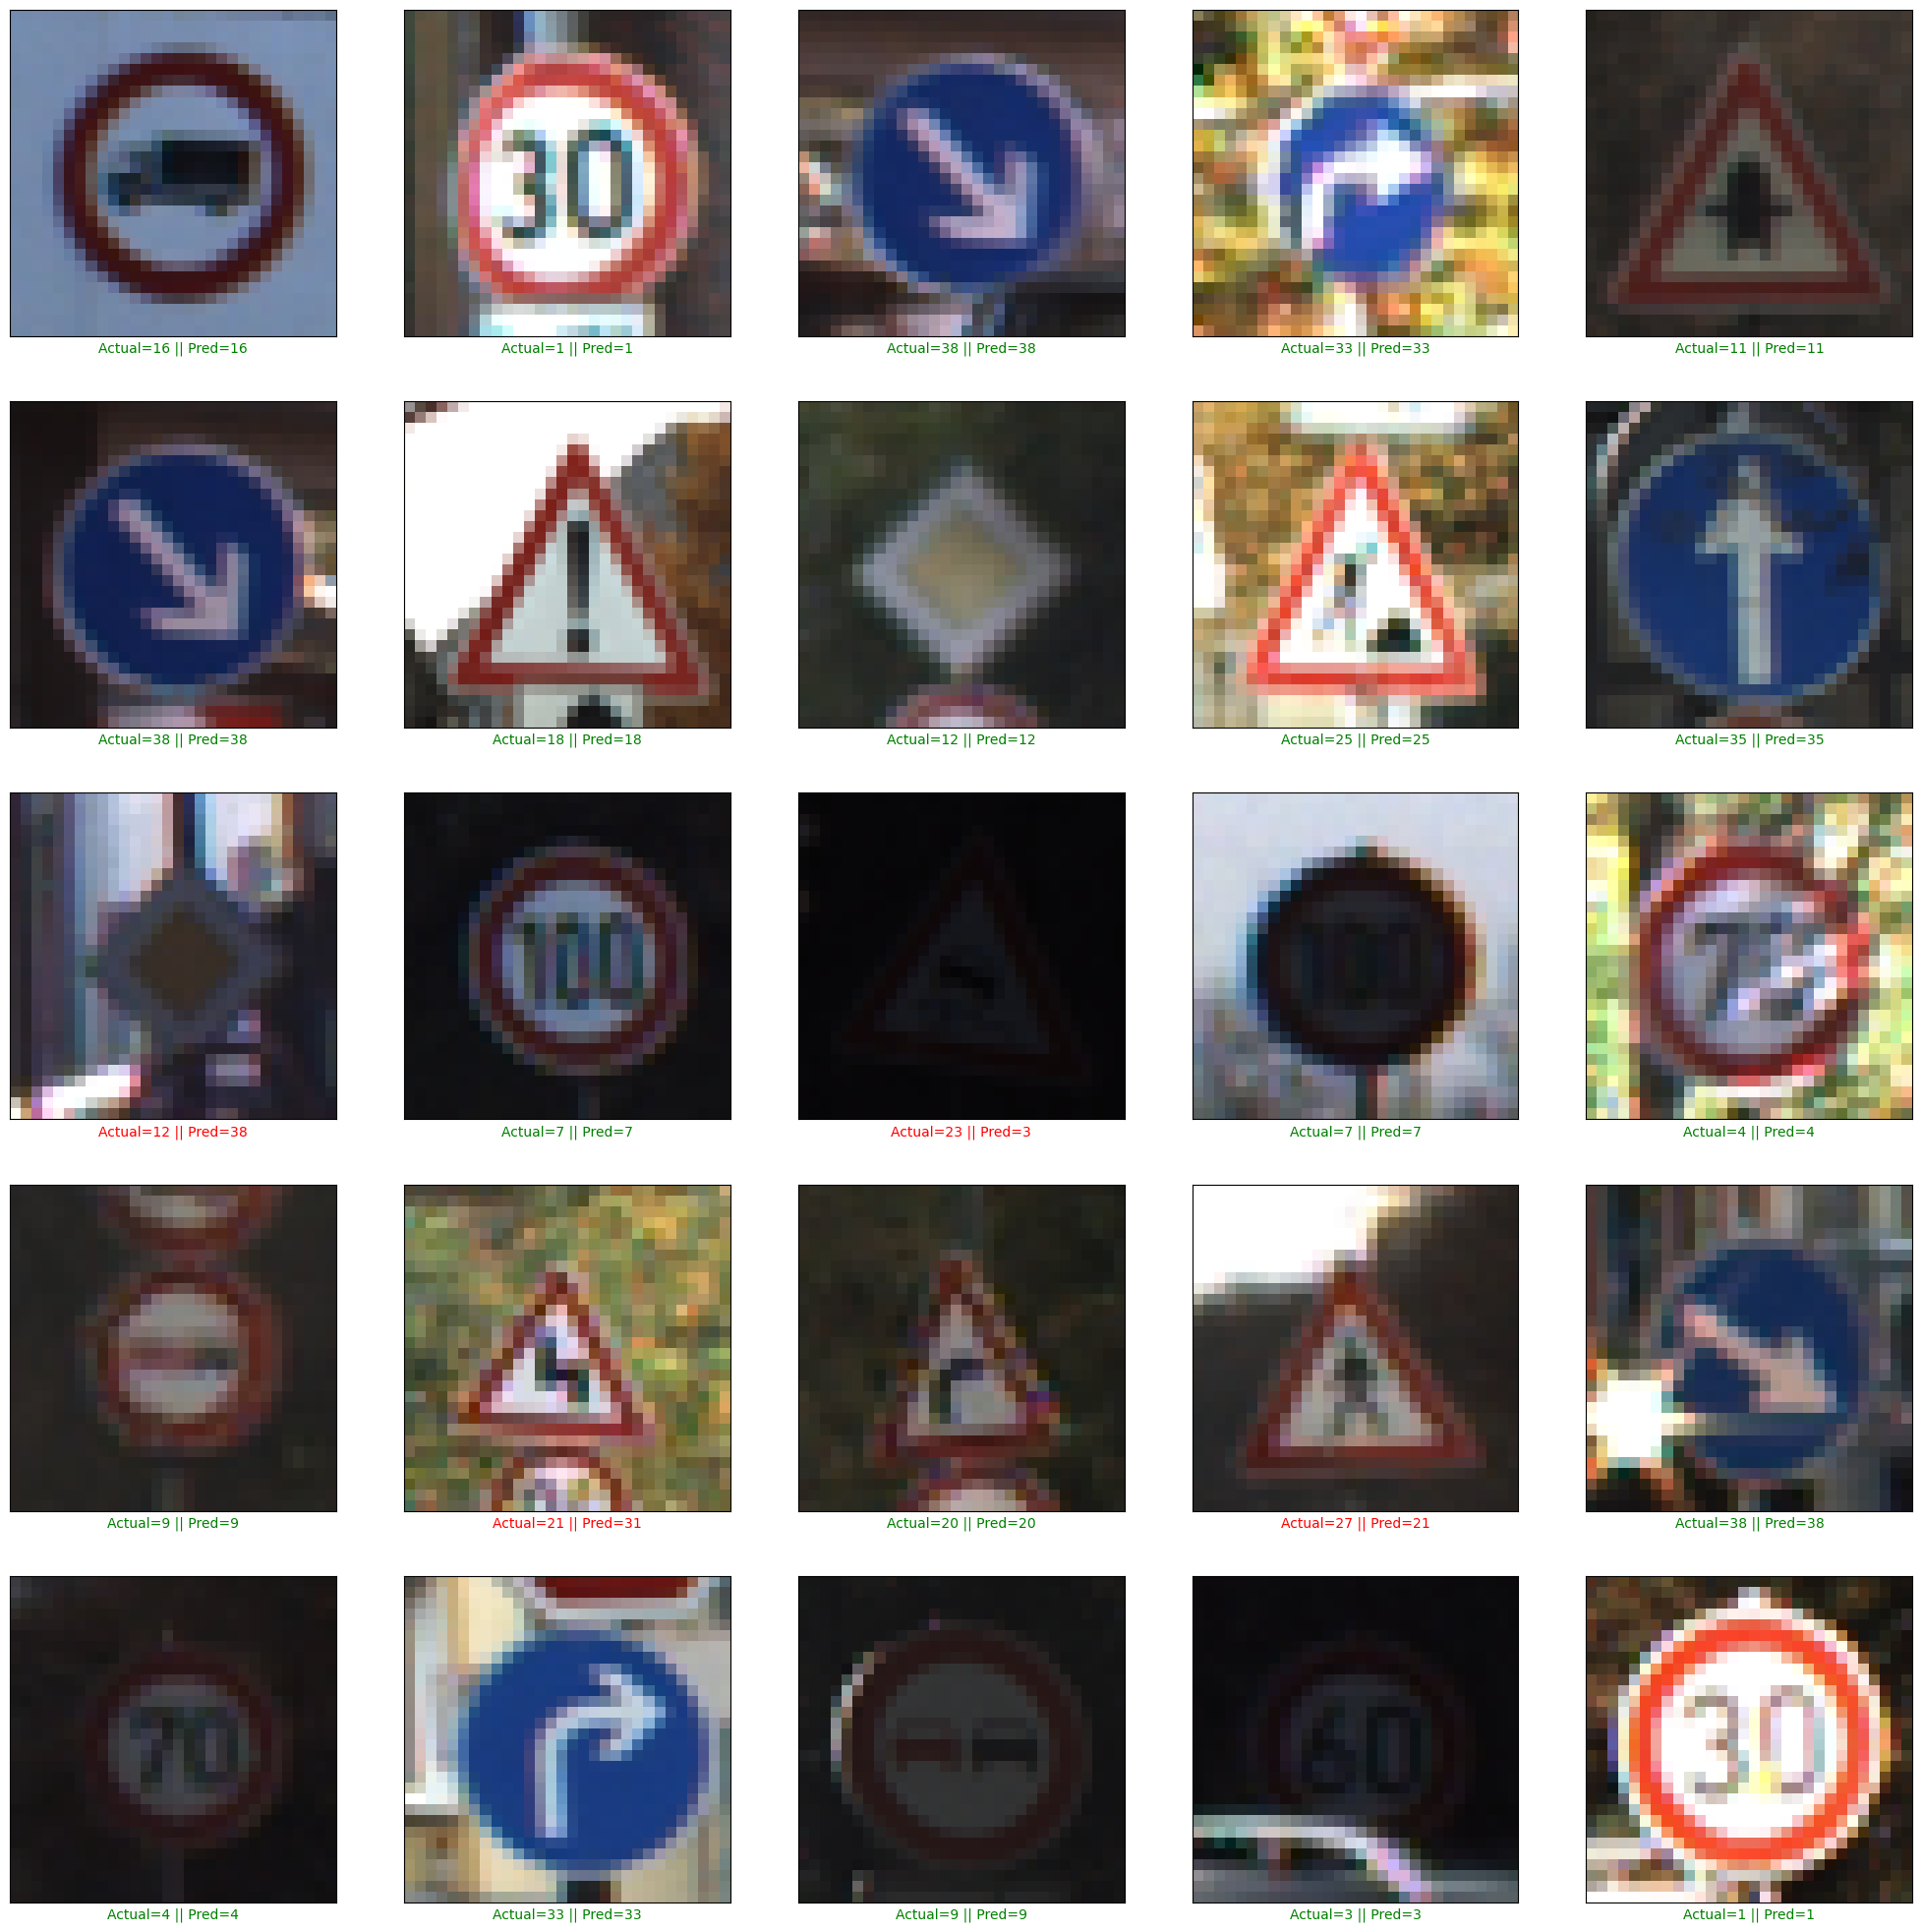

In [106]:
# plotting the images and leabling both the true label and the predicted label.
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

We see that our ML model does very well to predict the actual label. 

### Making a predictive System

Making a predictive system where you can upload any image of a traffic sign as .png and get the label prediction.

In [110]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

model_path = "model.h5"
loaded_model = tf.keras.models.load_model(model_path)

image = cv2.imread("00000_00000_00000-Copy1.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

image_fromarray = Image.fromarray(image_rgb, 'RGB')
resize_image = image_fromarray.resize((30, 30))
expand_input = np.expand_dims(resize_image, axis=0)
input_data = np.array(expand_input)
input_data = input_data / 255

pred = loaded_model.predict(input_data)
result = pred.argmax()
result
print(classes[result])

1/1 [==============================] - 0s 45ms/step
Yield
